In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [2]:
# remove all saved images in the current directory
for file in os.listdir():
    if file.endswith('.png'):
        os.remove(file)

### Plot Solutions

In [3]:
def plots2D(Z = 0, title = 'plot'):
    N = Z.shape[0]
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)

    # subplot
    plt.figure(figsize=(12, 6))
    im = plt.imshow(Z, cmap='jet', origin='lower')
    # plt.set_xlabel('X')
    # plt.set_ylabel('Y')
    
    cbar = plt.colorbar(im)
    cbar.set_label('Function Value')

    plt.tight_layout()
    plt.savefig(title + '.png')  # Save as PNG
    plt.show()

1089
N =  33


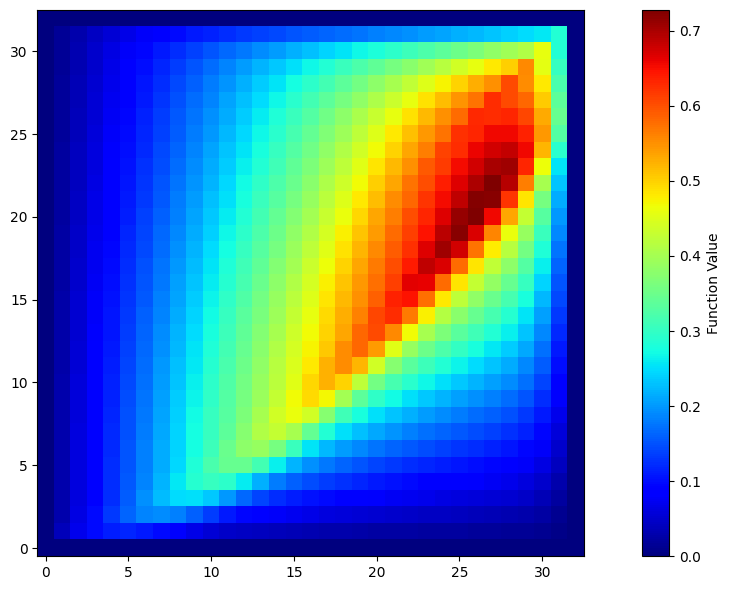

In [26]:
path = '../TestResults/TestCase2/2.7_pert/fdaPDE_SUPG_sol.txt'
# path = '../TestResults/TestCase0/0.10_perturbed/fdaPDE_SUPG_sol.txt'
data = np.loadtxt(path, delimiter=',')
print(data.size)
N = int(np.sqrt(data.size))
print("N = ", N)
data = data.reshape(N,N)
plots2D(data, 'TestCase0_sol')

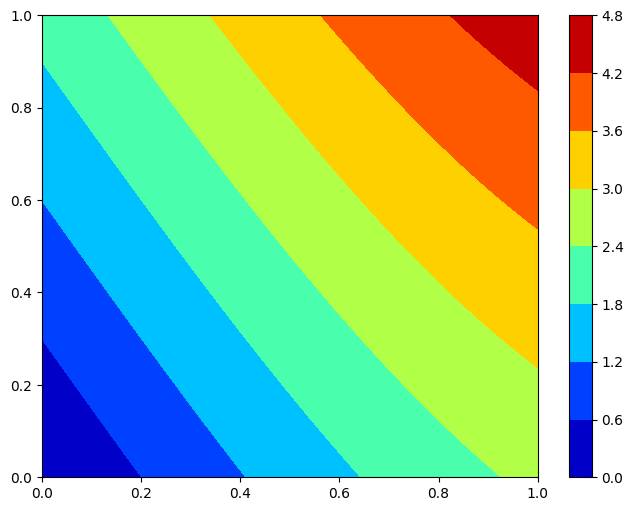

In [5]:
def exactSol(x, y):
    return 3 * np.sin(x) + 2 * y
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = exactSol(X, Y)
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, cmap='jet')
plt.colorbar(cp)  # Add a colorbar
plt.show()

### Delete previous observations

In [19]:
# delete a directory and all its content
shutil.rmtree('../../fdaPDE-cpp/test/data/transport/TransportTestCase2')
# recreate the directory empty
os.makedirs('../../fdaPDE-cpp/test/data/transport/TransportTestCase2')

### Prepare interpolation for observations

In [20]:
from scipy.interpolate import RegularGridInterpolator
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
interpolating_function = RegularGridInterpolator((x, y), data, method='linear')

### Interpolation grid points

In [21]:
n = 30
while n <= 70:
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    # create a two columns matrix with all the possible combinations of x and y
    z = np.array([[i, j] for i in x for j in y])
    # z = np.array([[j, i] for i in x for j in y])
    
    observations = interpolating_function(z)
    row_indices = np.arange(1, n*n + 1)
    result_matrix = np.column_stack((row_indices, observations))
    column_names = np.array(['', 'x'])
    result_matrix = np.vstack((column_names, result_matrix))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase2/observations' + str(n) + '.csv', result_matrix, delimiter=',', fmt='%s')
    
    # invert ordering of z to match the one of the C++ code and save locations
    z = np.array([[j, i] for i in x for j in y])
    z = np.column_stack((row_indices, z))
    column_names = np.array(['', 'V1', 'V2'])
    z = np.vstack((column_names, z))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase2/locs' + str(n) + '.csv', z, delimiter=',', fmt='%s')
    n += 10

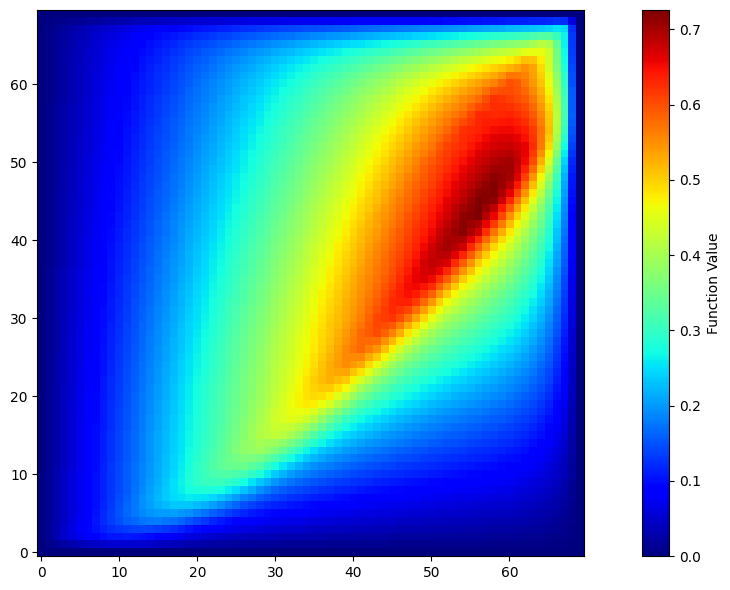

In [22]:
observations = observations.reshape(70, 70)
plots2D(observations, 'TestCase2_obs')

### Plot `model.f()`

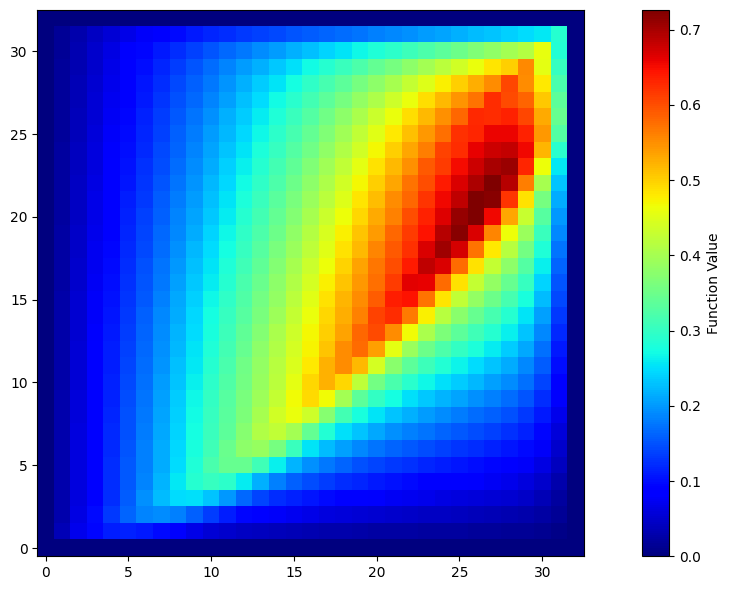

In [24]:
# path  = '../../fdaPDE-cpp_Carlotta/fdaPDE-cpp/test/build/'
path  = '../../fdaPDE-cpp/test/build/'
modelf = np.loadtxt(path + 'modelf.txt', delimiter=',')
N = int(np.sqrt(modelf.size))
modelf = modelf.reshape(N,N)
plots2D(modelf, 'TestCase2_modelf')

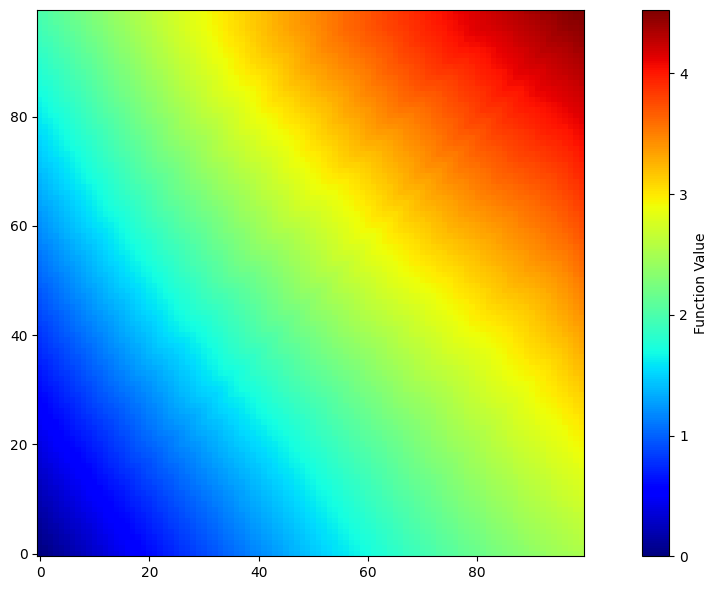

In [27]:
# path  = '../../fdaPDE-cpp_Carlotta/fdaPDE-cpp/test/build/'
path  = '../../fdaPDE-cpp/test/build/'
gridf = np.loadtxt(path + 'gridf.txt', delimiter=',')
N = int(np.sqrt(gridf.size))
gridf = gridf.reshape(N,N)
plots2D(gridf, 'gridf')

In [27]:
# compute error between model.f() and the exact solution (data)
error = np.abs(modelf - data)
# compute norm2 and norminf of the error
norm_error_2 = np.linalg.norm(error, 2)
norm_error_inf = np.linalg.norm(error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)

norm2 =  0.015202333738938305
norm_inf =  0.01918195147893526


In [ ]:
plots2D(error, 'TestCase2_error')

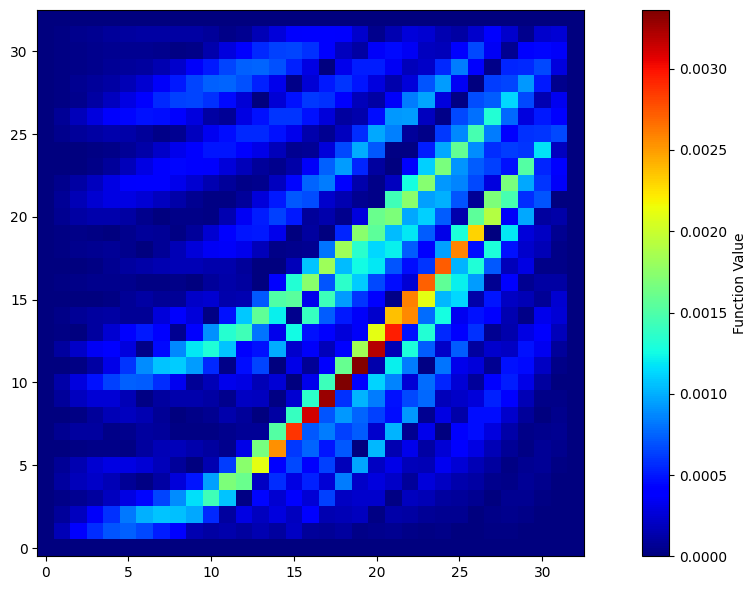

In [28]:
# Testcase2, lambda = 1e3, delta = 5 (expected computed with 5)

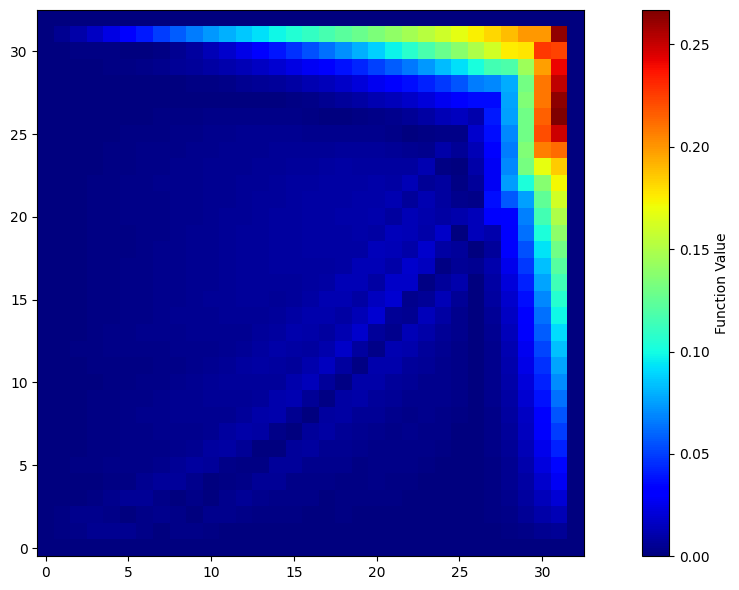

In [13]:
# Testcase2, lambda = 1e3, delta = 5 (expected computed with 2.285)

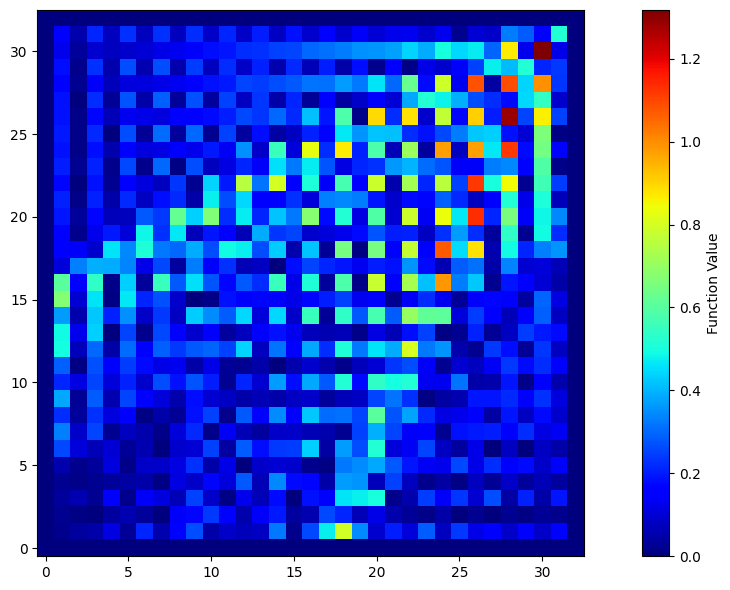

In [10]:
# Testcase 2, lambda = 1e3, delta = 0.0 (expected computed with 2.285)

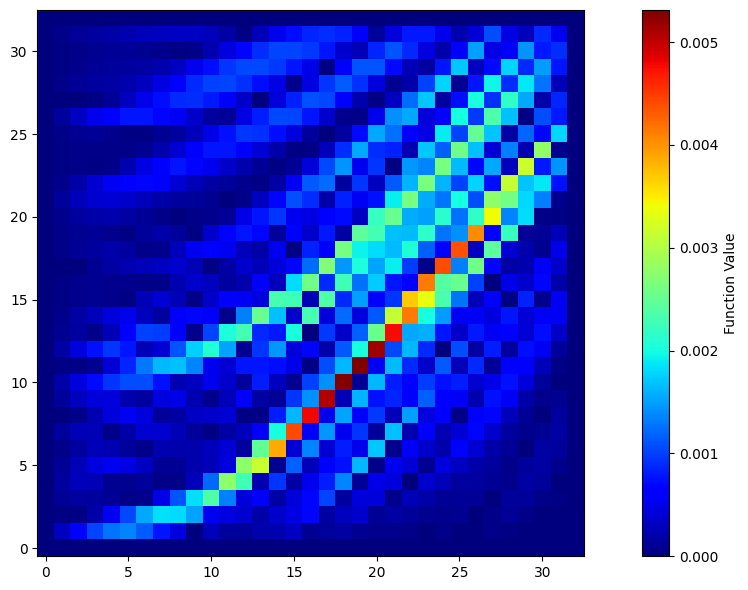

In [7]:
# Testcase 2, lambda = 1e3, delta = 2.285 (expected computed with 2.285)

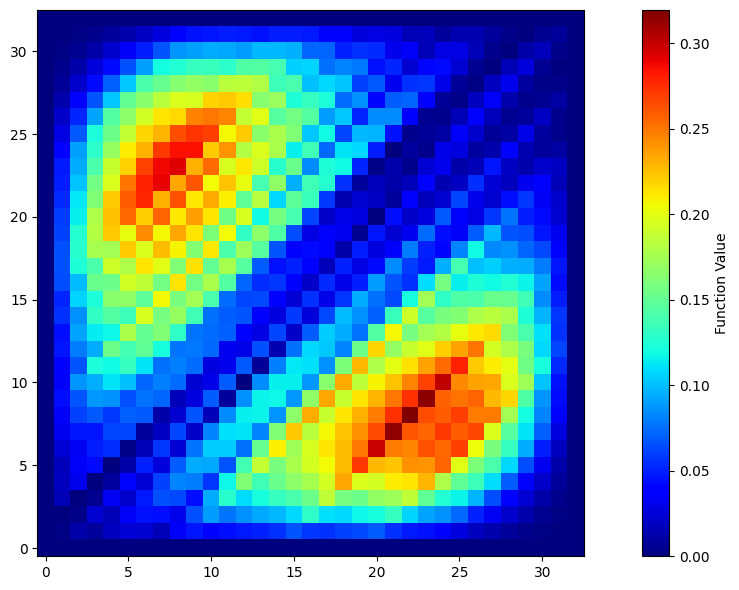

In [70]:
# lambda = 1e-6, stabilization parameter 1e5

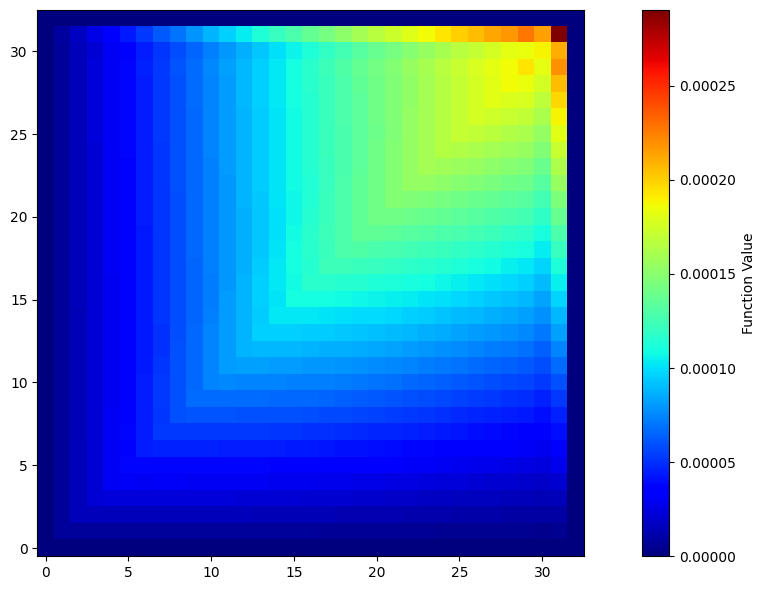

In [64]:
# plot with lambda = 1.0 and stabilization parameter 1e5

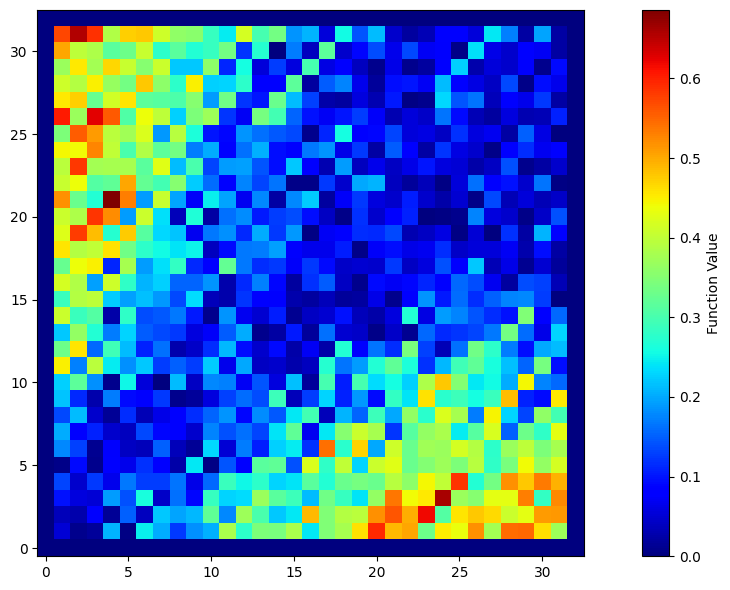

In [61]:
# plot with lambda = 1.0 and stabilization parameter 1.0

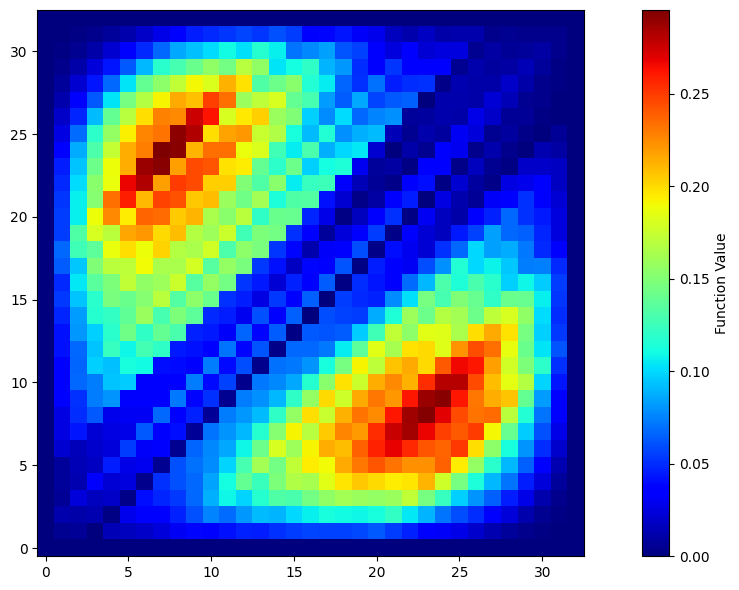

In [58]:
# plot with lambda = 1.0 and stabilization parameter 100.0

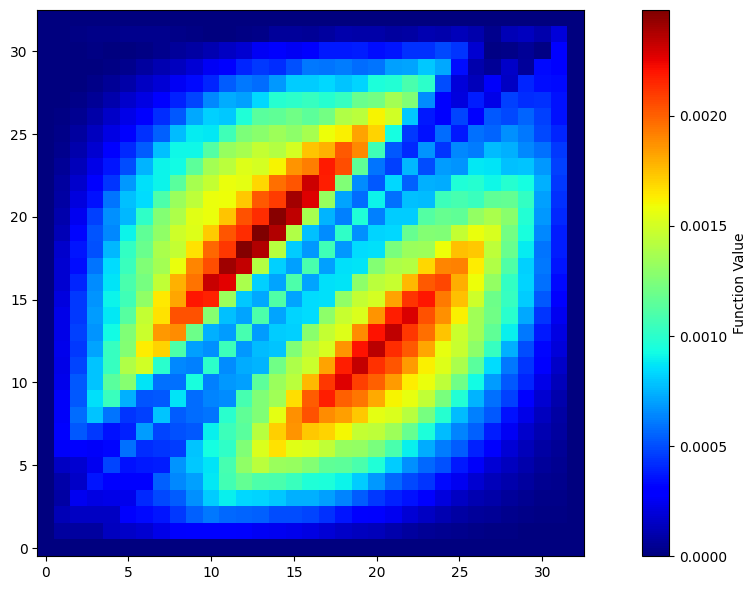

In [55]:
# plot with stabilization parameter 100.0

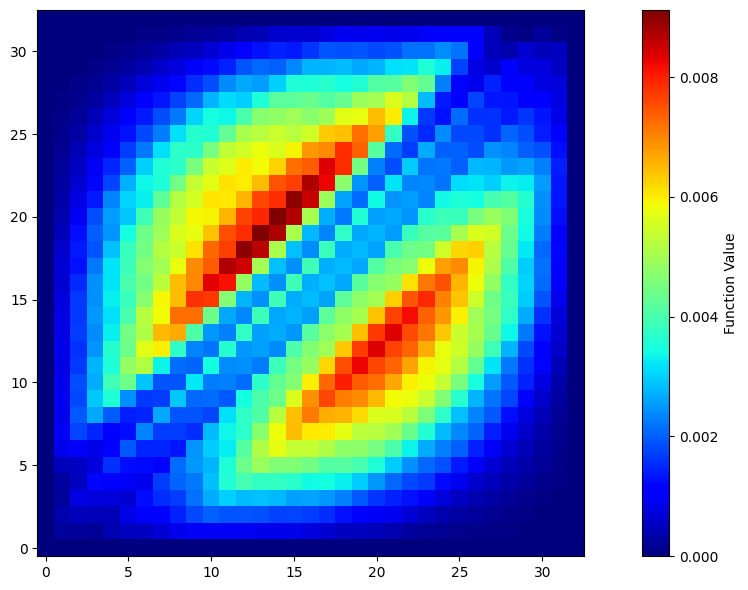

In [52]:
# plot with stabilization parameter 50.0

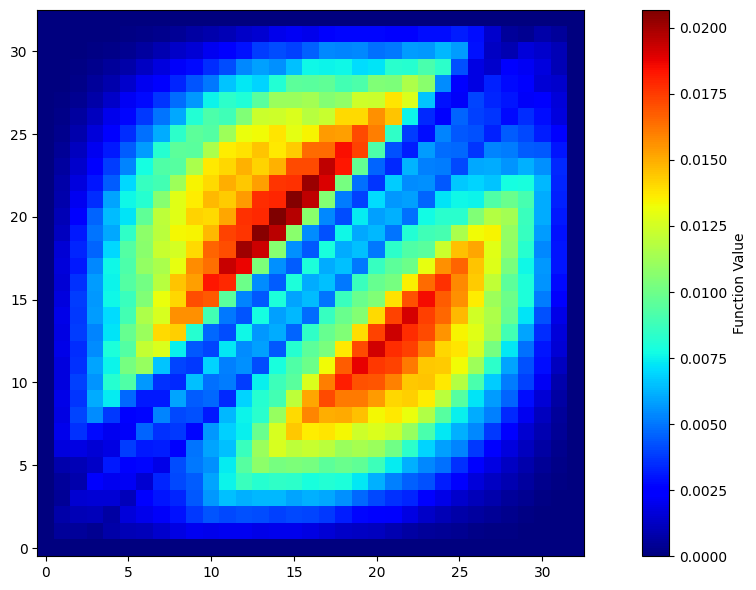

In [49]:
# plot with stabilization parameter 30.0

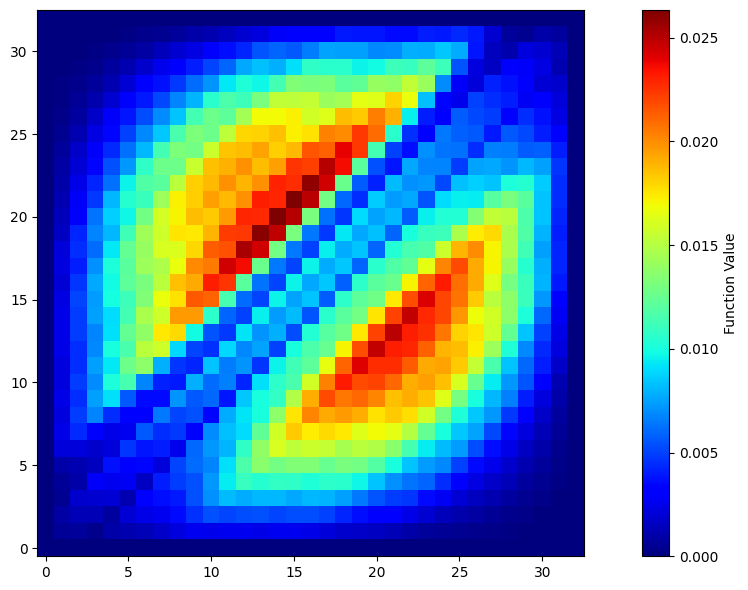

In [46]:
# plot with stabilization parameter 25.0

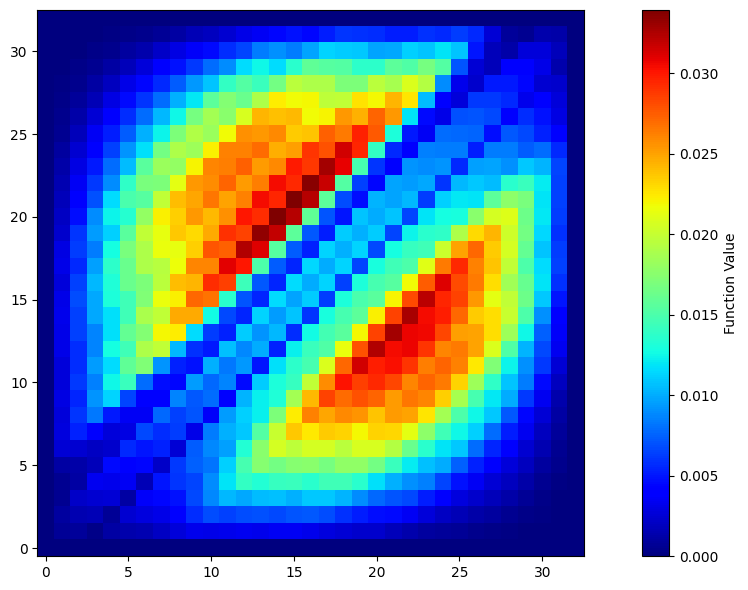

In [43]:
# plot with stabilization parameter 20.0

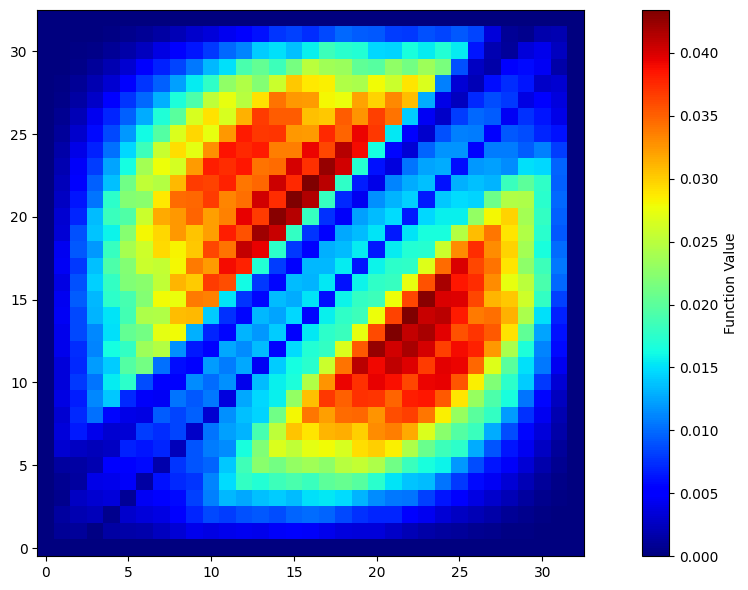

In [40]:
# plot with stabilization parameter 15.0

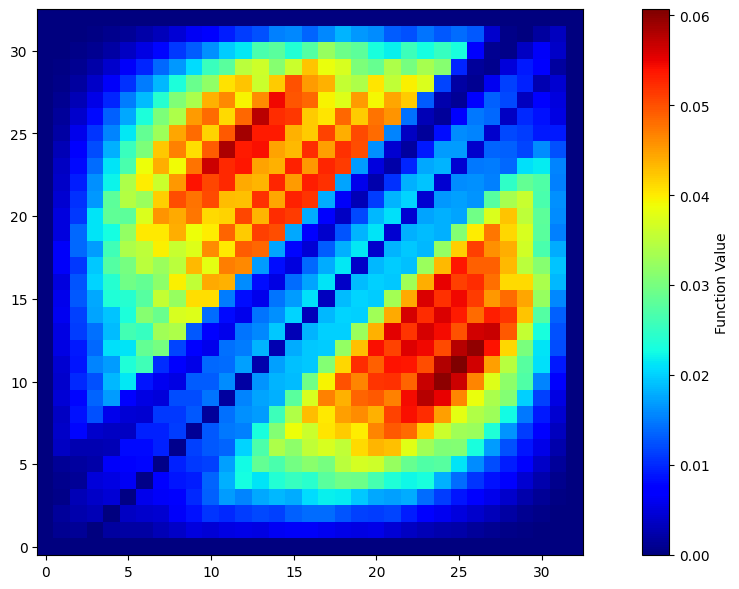

In [35]:
# plot with stabilization parameter 10.0

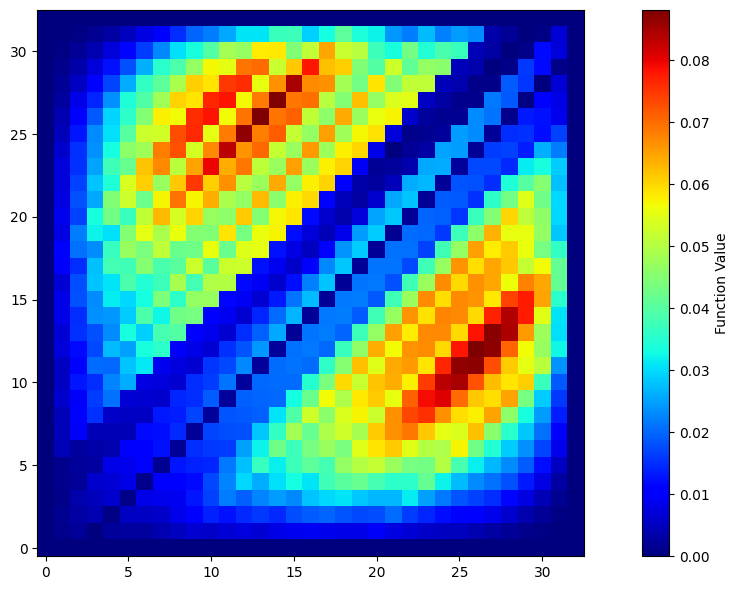

In [32]:
# plot with stabilization parameter 5.0

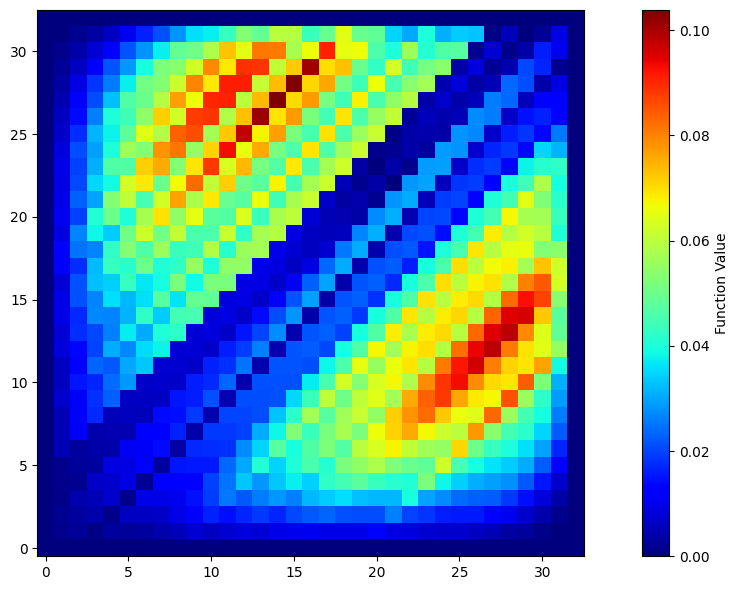

In [29]:
# plot with stabilization parameter 3.0

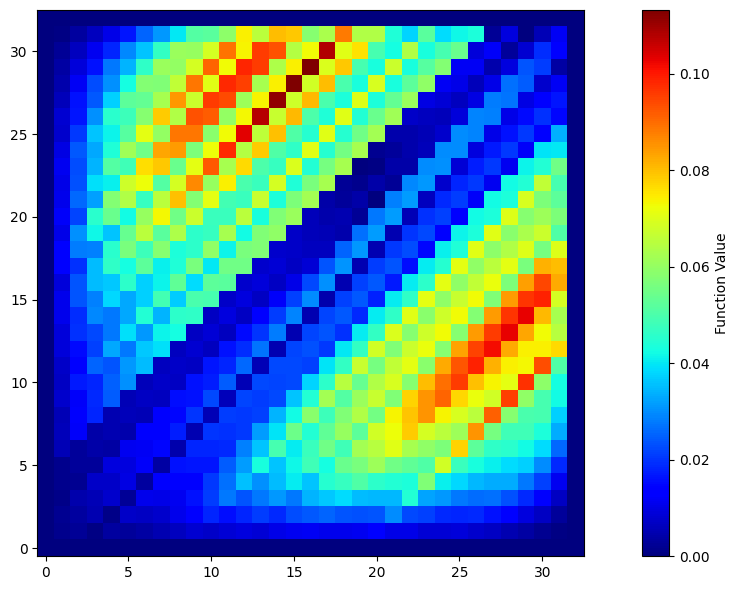

In [17]:
# plot with stabilization parameter 2.0

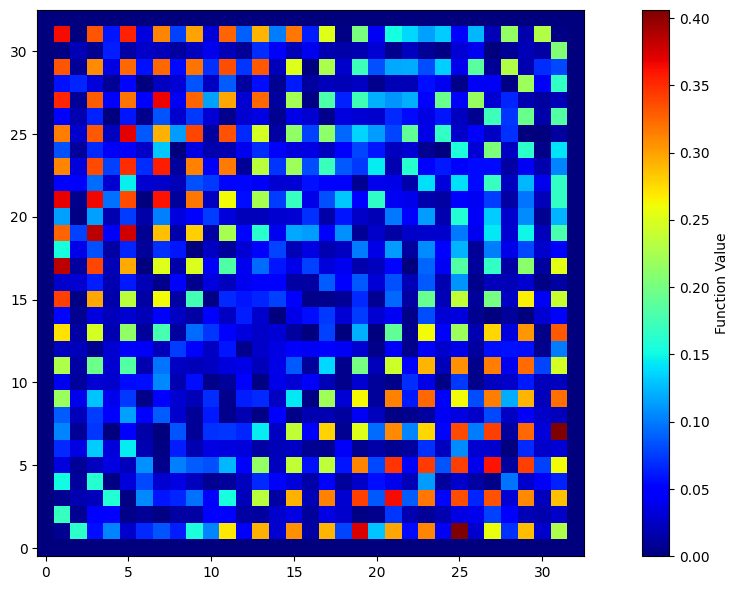

In [14]:
# blot without SUPG stabilization

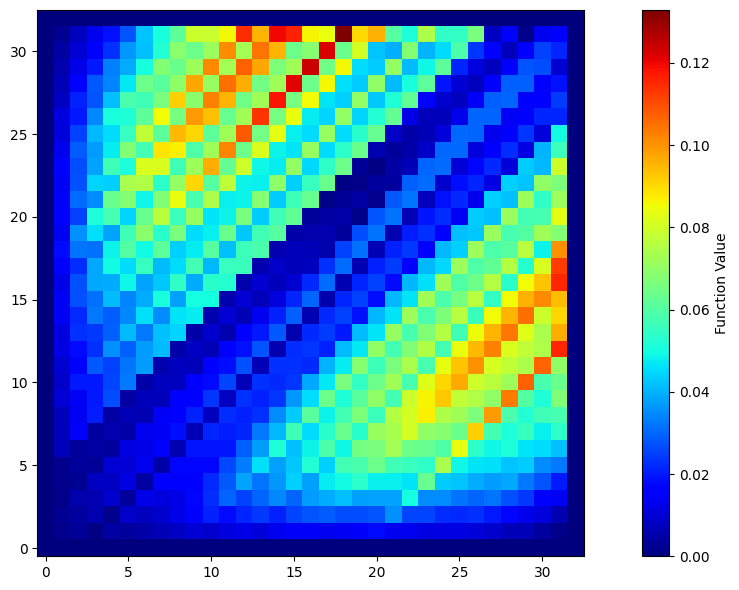

In [11]:
# plot with stabilization parameter 1.0

### Interpolation random points

In [ ]:
n = 30
while n <= 180:
    # create n random points in the square [0,1]x[0,1]
    x = np.random.rand(n)
    y = np.random.rand(n)
    z = np.array([[i, j] for i in x for j in y])
    
    observations = interpolating_function(z)
    row_indices = np.arange(1, n*n + 1)
    result_matrix = np.column_stack((row_indices, observations))
    column_names = np.array(['', 'x'])
    result_matrix = np.vstack((column_names, result_matrix))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase1/observations' + str(n) + '.csv', result_matrix, delimiter=',', fmt='%s')
    n += 5

### Prepare expected csv

In [23]:
# data = np.loadtxt('../TestResults/TestCase0/0.10_perturbed/fdaPDE_SUPG_sol.txt')
data = np.loadtxt('../TestResults/TestCase2/2.7_pert/fdaPDE_SUPG_sol.txt')
N = data.size
row_indices = np.arange(1, N + 1)
data = np.column_stack((row_indices, data))
column_names = np.array(['', 'x'])
data = np.vstack((column_names, data ))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase2/expected.csv', data, delimiter=',', fmt='%s')

### Prepare points and locations with exact solution

In [ ]:
# no need to interpolate when I have the exact solution
def exactSol(x, y):
    return 3*np.sin(x) + 2*y

#### Prepare test locations when you have exact solution

In [18]:
n = 30
while n <= 70:
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    # create a two columns matrix with all the possible combinations of x and y
    z = np.array([[i, j] for i in x for j in y])
    
    observations = exactSol(z[:,0], z[:,1])
    row_indices = np.arange(1, n*n + 1)
    result_matrix = np.column_stack((row_indices, observations))
    column_names = np.array(['', 'x'])
    result_matrix = np.vstack((column_names, result_matrix))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/observations' + str(n) + '.csv', result_matrix, delimiter=',', fmt='%s')
    
    z = np.array([[j, i] for i in x for j in y])
    z = np.column_stack((row_indices, z))
    column_names = np.array(['', 'V1', 'V2'])
    z = np.vstack((column_names, z))
    np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/locs' + str(n) + '.csv', z, delimiter=',', fmt='%s')
    n += 10

In [ ]:
# test locations for the gridf
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
z = np.array([[i, j] for i in x for j in y])
observations = exactSol(z[:,0], z[:,1])
row_indices = np.arange(1, n*n + 1)
result_matrix = np.column_stack((row_indices, observations))
column_names = np.array(['', 'x'])
result_matrix = np.vstack((column_names, result_matrix))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/test_values.csv', result_matrix, delimiter=',', fmt='%s')

z = np.array([[j, i] for i in x for j in y])
z = np.column_stack((row_indices, z))
column_names = np.array(['', 'V1', 'V2'])
z = np.vstack((column_names, z))
np.savetxt('../../fdaPDE-cpp/test/data/transport/TransportTestCase0/test_locs.csv', z, delimiter=',', fmt='%s')


In [ ]:
# compare error between gridf and exact solution
gridf_exact = observations.reshape(100, 100).T # this transpose is the reason why I need to invert z to save the locations
plots2D(gridf_exact, 'gridf_exact')

In [ ]:
# put in a subplot 2x2 both gridf and observations transposed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gridf, cmap='jet', origin='lower')
plt.title('FEM interpolation of model.f()')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(gridf_exact, cmap='jet', origin='lower')
plt.title('exact sol')
plt.colorbar()
plt.tight_layout()
# save plot
plt.savefig('gridf_gridf_exact.png')
plt.show()


In [ ]:
# compute error between model.f() and the exact solution (data)
error = np.abs(gridf - gridf_exact)
# compute norm2 and norminf of the error
norm_error_2 = np.linalg.norm(error, 2)
norm_error_inf = np.linalg.norm(error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)

In [ ]:
plots2D(error, 'gridf_error')